In [ ]:
# install packages needed for first time users
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from math import sqrt

In [2]:
dataset = pd.read_csv('USROP_A 1 N-S_F-7d_F.csv')
dataset = dataset.rename(columns={'Measured Depth m':'DEPTH','Weight on Bit kkgf':'WOB','Average Standpipe Pressure kPa':'SPP','Average Surface Torque kN.m':'Torque',
                                                'Rate of Penetration m/h':'ROP','Average Rotary Speed rpm':'RPM','Mud Flow In L/min':'MFI','Mud Density In g/cm3':'MDI','Diameter mm':'DIA',
                                                'Average Hookload kkgf':'HookLoad','Hole Depth (TVD) m':'TVD','USROP Gamma gAPI':'USROP'})
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
col = list(dataset)
col.insert(13,col.pop(col.index('ROP')))
dataset = dataset.loc[0:,col]
df = pd.DataFrame()
df = df.append(dataset,ignore_index=True)
del df['Unnamed: 0.1']
X = df.iloc[:,0:10]
y = df.iloc[:,11]
df

,DEPTH,WOB,SPP,Torque,RPM,MFI,MDI,DIA,HookLoad,TVD,USROP,ROP
0,301.231,3.834133,13463.00049,4.159999,208,4260.66992,1.03,444.5,95.129326,301.220124,43.497,64.580002
1,301.295,3.834133,13463.00049,4.159999,208,4260.66992,1.03,444.5,95.129326,301.285351,43.497,64.580002
2,301.334,3.834133,13463.00049,4.159999,208,4260.66992,1.03,444.5,95.129326,301.324670,43.497,64.580002
3,301.438,3.834133,13463.00049,4.159999,208,4260.66992,1.03,444.5,95.129326,301.428912,43.497,64.580002
4,301.447,3.834133,13463.00049,4.159999,208,4260.66992,1.03,444.5,95.129326,301.437751,38.664,64.580002
...,...,...,...,...,...,...,...,...,...,...,...,...
6384,633.374,8.014969,10348.00034,6.550000,143,3434.46997,1.03,444.5,99.075631,633.068076,84.578,38.529999
6385,633.420,8.014969,10348.00034,6.550000,143,3434.46997,1.03,444.5,99.075631,633.208589,84.578,38.529999
6386,633.478,8.014969,10348.00034,6.550000,143,3434.46997,1.03,444.5,99.075631,633.266196,84.578,38.529999
6387,633.527,8.014969,10348.00034,6.550000,143,3434.46997,1.03,444.5,99.075631,633.219562,82.161,38.529999


In [5]:
#train_x, test_x, train_y,  test_y = train_test_split(samples,results, test_size=0.5, random_state=42)
# random splitting by default
train_x, test_x, train_y,  test_y = train_test_split(X,y, test_size=0.2, random_state=42)

In [3]:
def evaluate_model(rf, X,y):
    rf.fit(X, y)
    predictions = rf.predict(X)

    plt.figure(figsize=(10,10))

    # Use the forest's predict method on the test data
    # Calculate the absolute errors
    errors = np.abs(predictions - y)  
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 10), 'units')
    # Calcuate R2 and print it
    R2 = r2_score(y, predictions)
    print('R2= ',R2)
    
    # Determine prediction values for both training and testing data
    train_x, test_x, train_y,  test_y = train_test_split(X,y, test_size=0.2, random_state=42)
    predictions_train = rf.predict(train_x)
    predictions_test = rf.predict(test_x)
    predictions = rf.predict(X)
    R2_train = r2_score(train_y, predictions_train)
    R2_test = r2_score(test_y, predictions_test)
    print('R2_train= ',R2_train)
    print('R2_test= ',R2_test)
    print("rmse:", sqrt(mean_squared_error(y, predictions)))
    
    plt.rcParams['font.sans-serif'] = ['Times New Roman']
    plt.scatter(train_y, predictions_train, s=20, c="black", label="Train Data", alpha=1)
    plt.scatter(test_y, predictions_test, s=20, c="blue", label="Test Data", alpha=0.5)
    plt.plot([0, np.max([y, predictions])], [0, np.max([y, predictions])], c="red", linewidth=1,
              linestyle="-.", label="Perfect prediction")
    text = "R2 = " + str(np.round(R2,3))

    plt.annotate(text, (1,0),fontsize=15)                    
    plt.xlabel("Actual ROP",fontsize=15)    
    plt.ylabel("Predicted ROP",fontsize=15)       
    plt.xticks(fontsize=15)                              
    plt.yticks(fontsize=15)                              
    plt.legend(loc = 'best', fontsize=15)                             
    plt.grid()
    plt.show()
    return r2_score(y, predictions)

Mean Absolute Error: 4.2341292601 units
R2=  0.8808551572266619
R2_train=  0.8809264375797001
R2_test=  0.880426185216968
rmse: 5.531842890197951


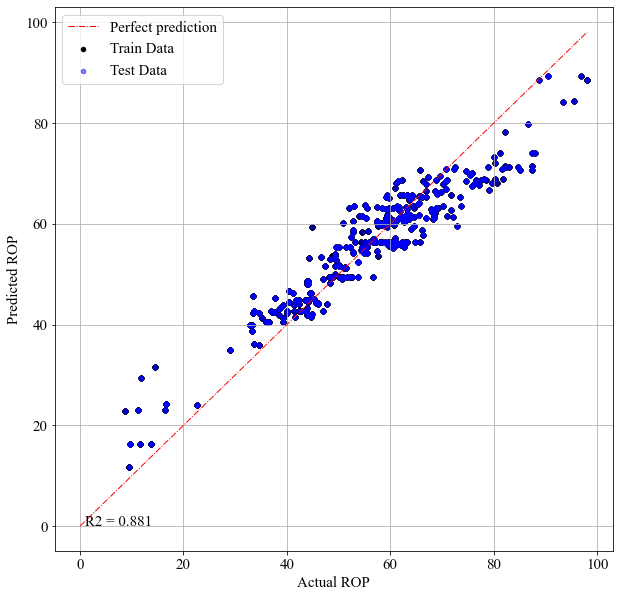

0.8808551572266619

In [34]:
rf = GradientBoostingRegressor( n_estimators=30)
evaluate_model(rf,X,y)
# fig.savefig('randomforest.png', format='png', dpi=600)

Mean Absolute Error: 8.7849311309 units
R2=  0.4311584319883701
R2_train=  0.4407857332676032
R2_test=  0.3894618517287115
rmse: 12.087260317873472


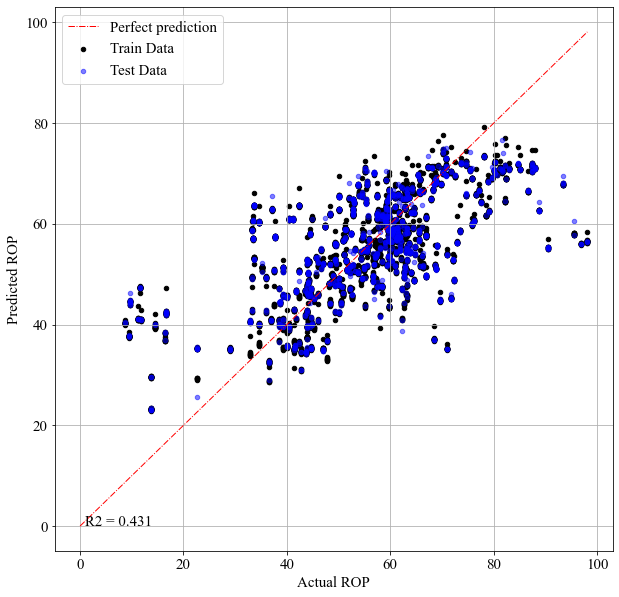

0.4311584319883701

In [35]:
rf = LinearRegression()
evaluate_model(rf,X,y)

Mean Absolute Error: 0.0154110973 units
R2=  0.9998826222403251
R2_train=  0.999901836466446
R2_test=  0.9998004689740793
rmse: 0.1736301422410265


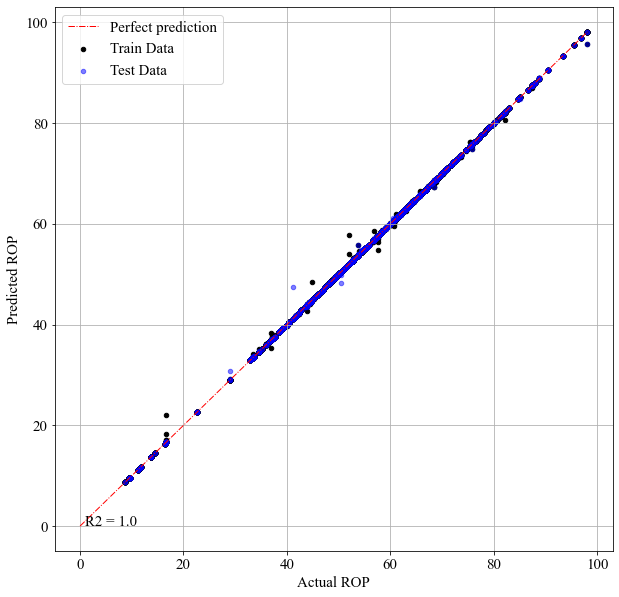

0.9998826222403251

In [36]:
rf = RandomForestRegressor() #n_estimators = 20, random_state = 23, max_depth=3
evaluate_model(rf,X,y)

Mean Absolute Error: 11.9845944645 units
R2=  0.14225484196369909
R2_train=  0.15061944813408334
R2_test=  0.10564675910926447
rmse: 14.842646716955903


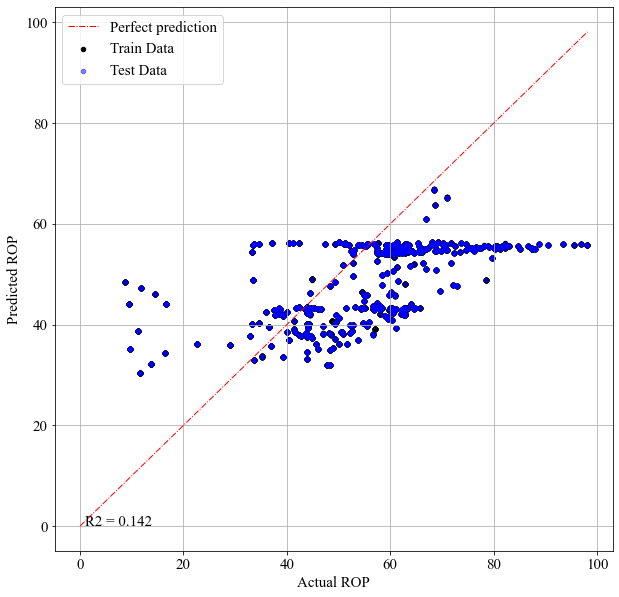

0.14225484196369909

In [37]:
rf = MLPRegressor() #hidden_layer_sizes=(150), activation='relu', solver='adam'

#check documentation for all the options https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
evaluate_model(rf,X,y)

Mean Absolute Error: 5.7811524233 units
R2=  0.8040619964192353
R2_train=  0.8072815911834715
R2_test=  0.7901117165358053
rmse: 7.094006014077889


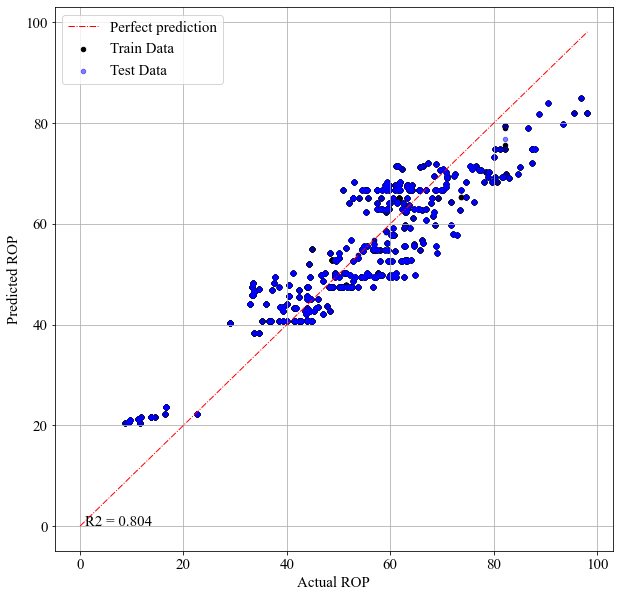

0.8040619964192353

In [38]:
rf = AdaBoostRegressor()
evaluate_model(rf,X,y)

Mean Absolute Error: 0.0 units
R2=  1.0
R2_train=  1.0
R2_test=  1.0
rmse: 2.6801290206051524e-15


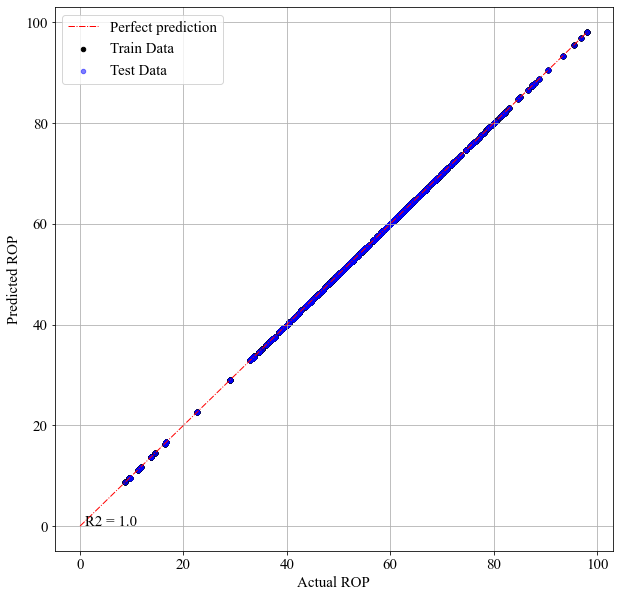

1.0

In [39]:
rf = KNeighborsRegressor()
evaluate_model(rf,X,y)